# Capital Asset Pricing Model (CAPM)
- Relationship between systematic risk and expected return
- There are several assumptions behinf CAPM formula that have shown not to always hold in reality
- CAPM formula is still widely used

### Formula
$ER_i = R_f + \beta_i\left(ER_m-R_f\right)$
- $ER_i$: expected return from investment
- $R_f$: risk-free return
- $\beta_i$: the beta of the investment (correlation between systematic risk and ____)
- $\left(ER_m-R_f\right)$: market risk premium

We assume as **risk free return** the 10 year Treasury Note available at this [link](https://www.treasury.gov/resource-center/data-center/interest-rates/pages/textview.aspx?data=yield).

**Market risk premium** 

### Additional Resources
- CAPM at https://www.investopedia.com/terms/c/capm.asp



### Imports

In [38]:
import numpy as np
import pandas_datareader as pdr
import datetime as dt
import pandas as pd
from utils import get_summary

## 1. Individual Stock

### 1.1. Risk Free Return
In this section data from [Fama&French](http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html) will be used.
If you are running this notebook please download the csv file and save it at `./data/F-F_Research_Data_Factors_CSV.zip`.

In [39]:
# RISK-FREE RETURN FAMA&FRENCH
dateparse = lambda x: dt.datetime.strptime(x,'%Y%m')
french_fries_df = pd.read_csv('./data/F-F_Research_Data_Factors.CSV',
                        header=0,
                        names=['Date','Mkt-RF','SMB','HML','RF'],
                        parse_dates=['Date'], date_parser=dateparse,
                        index_col=0,
                        skipfooter=99,
                        skiprows=3,
                        engine='python')

# Rf
risk_free_rets = french_fries_df['RF'].loc[french_fries_df.index >= '1992-01-01']/100
# (Rm - Rf)
market_risk_premium = french_fries_df['Mkt-RF'].loc[french_fries_df.index >= '1992-01-01']/100
#french_fries_df.loc[french_fries_df.index == '1993-01-01']

### 1.2. Stocks Data for 🍎 S&P500
For the first part of the assignment only one stock is considered for the analysis (`AAPL`). It is compared with the S&P500 index.

In [40]:
ticker = 'AAPL','^GSPC'
start = dt.datetime(1992,1,1)
end = dt.datetime(2022,1,1)

raw_df = pdr.get_data_yahoo(ticker, start, end, interval='m')
# Adj Close for AAPL stock
aapl_df = raw_df['Adj Close']['AAPL']
# Adj Close for S&P500 index
spx_df = raw_df['Adj Close']['^GSPC']



Find Stock returns on monthly basis:

In [41]:
# AAPL stock monthly returns
aapl_monthly_rets = aapl_df.pct_change(1, fill_method='ffill')
aapl_monthly_rets.fillna(0, inplace=True)

# S&P500 index monthly returns
spx_monthly_rets = spx_df.pct_change(1, fill_method='ffill')
spx_monthly_rets.fillna(0, inplace=True)


### Regression on Stock and S&P500
Let's now perform regression using `AAPL` stock and `S&P500` index.
But first let's split data into $5$, $15$ and $30$ year batches for a comparison.

In [42]:
# BATCHIN
aapl_df_30y = aapl_df
aapl_df_15y = aapl_df[aapl_df.index >= '2006-12-01']
aapl_df_5y = aapl_df[aapl_df.index >= '2016-12-01']

## 2. Multi-Stocks Portfolio
Let's consider the following Stocks in a portfolio:
| **Ticker**  | Company         | Branch        |
| :---:       |    :----:       |    :---:      |
| **AAPL**    | Apple           | tech          |
| **MSFT**    | Microsoft       | tech          |
| **NFLX**    | Netflix         | entertainment |
| **IBM**     | IBM             | tech          |
| **BTC-USD** | Bitcoin         | crypto        |
| **2222.SR** | Aramco          | oil           |
| **BA**      | Boeing          | transports    |
| **DIS**     | WaltDisney      | entertainment |
| **DAL**     | DeltaAirlines   | transports    |
| **LYFT**    | Lyft            | transports    |

In [43]:
# Get data from tickers
tickers = ['AAPL', 'MSFT', 'NFLX', 'IBM', 'BTC-USD', '2222.SR', 'BA', 'DIS', 'DAL', 'LYFT']
start = dt.datetime(1992,1,1)
end = dt.datetime(2022,1,1)

pf_df = pdr.get_data_yahoo(tickers, start, end, interval='m')
pf_df.fillna(0)

Attributes   Adj Close                                                    \
Symbols           AAPL        MSFT        NFLX         IBM       BTC-USD   
Date                                                                       
1992-01-01    0.472640    1.583025    0.000000   10.784657      0.000000   
1992-02-01    0.492714    1.625809    0.000000   10.410188      0.000000   
1992-03-01    0.425989    1.559987    0.000000   10.146499      0.000000   
1992-04-01    0.439701    1.451380    0.000000   11.027484      0.000000   
1992-05-01    0.436959    1.592897    0.000000   11.027484      0.000000   
...                ...         ...         ...         ...           ...   
2021-11-01  164.849091  329.305359  641.900024  114.182587  57005.425781   
2021-11-30    0.000000    0.000000    0.000000    0.000000      0.000000   
2021-12-01  177.344055  335.626038  602.440002  132.069168  46306.445312   
2021-12-31    0.000000    0.000000    0.000000    0.000000      0.000000   
2022-01-01  174.557602  310.338318  427.140015  131.980240  38483.125000   

Attributes                                                           ...  \
Symbols       2222.SR          BA         DIS        DAL       LYFT  ...   
Date                                                                 ...   
1992-01-01   0.000000   14.271676    8.311022   0.000000   0.000000  ...   
1992-02-01   0.000000   12.904114    9.375307   0.000000   0.000000  ...   
1992-03-01   0.000000   12.370326    9.245731   0.000000   0.000000  ...   
1992-04-01   0.000000   12.405563    8.887486   0.000000   0.000000  ...   
1992-05-01   0.000000   12.370326    9.281074   0.000000   0.000000  ...   
...               ...         ...         ...        ...        ...  ...   
2021-11-01   0.000000  197.850006  144.899994  36.200001  40.610001  ...   
2021-11-30  35.799999    0.000000    0.000000   0.000000   0.000000  ...   
2021-12-01   0.000000  201.320007  154.889999  39.080002  42.730000  ...   
2021-12-31  37.349998    0.000000    0.000000   0.000000   0.000000  ...   
2022-01-01   0.000000  200.240005  142.970001  39.689999  38.520000  ...   

Attributes        Volume                                          \
Symbols             AAPL          MSFT         NFLX          IBM   
Date                                                               
1992-01-01  4.703160e+09  1.468930e+09          0.0  155472002.0   
1992-02-01  2.534997e+09  1.394030e+09          0.0  114557919.0   
1992-03-01  2.985662e+09  1.204272e+09          0.0  140382404.0   
1992-04-01  3.931390e+09  2.138962e+09          0.0  161236715.0   
1992-05-01  2.703725e+09  1.069234e+09          0.0  118213064.0   
...                  ...           ...          ...          ...   
2021-11-01  1.691029e+09  5.098852e+08   64530200.0  120104799.0   
2021-11-30  0.000000e+00  0.000000e+00          0.0          0.0   
2021-12-01  2.444767e+09  6.256748e+08   59975300.0  113968900.0   
2021-12-31  0.000000e+00  0.000000e+00          0.0          0.0   
2022-01-01  2.108446e+09  9.475314e+08  241662000.0  146976800.0   

Attributes                                                                   \
Symbols          BTC-USD     2222.SR           BA          DIS          DAL   
Date                                                                          
1992-01-01  0.000000e+00         0.0   62902800.0  205873289.0          0.0   
1992-02-01  0.000000e+00         0.0   55944200.0  149866802.0          0.0   
1992-03-01  0.000000e+00         0.0   44486200.0  122744245.0          0.0   
1992-04-01  0.000000e+00         0.0   42364200.0  174114951.0          0.0   
1992-05-01  0.000000e+00         0.0   38310600.0  150992296.0          0.0   
...                  ...         ...          ...          ...          ...   
2021-11-01  1.053270e+12         0.0  222628900.0  349411000.0  276217900.0   
2021-11-30  0.000000e+00  87108353.0          0.0          0.0          0.0   
2021-12-01  9.570472e+11         0.0  212678500.

Find Stock returns on monthly basis:

In [44]:
pf_monthly_rets = pf_df['Adj Close'].pct_change(1, fill_method='ffill')
pf_monthly_rets.fillna(0, inplace=True)
pf_monthly_rets

Symbols,AAPL,MSFT,NFLX,IBM,BTC-USD,2222.SR,BA,DIS,DAL,LYFT
Date,,,,,,,,,,
1992-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1992-02-01,0.042472,0.027027,0.000000,-0.034722,0.000000,0.000000,-0.095824,0.128057,0.000000,0.000000
1992-03-01,-0.135423,-0.040486,0.000000,-0.025330,0.000000,0.000000,-0.041366,-0.013821,0.000000,0.000000
1992-04-01,0.032188,-0.069620,0.000000,0.086827,0.000000,0.000000,0.002849,-0.038747,0.000000,0.000000
1992-05-01,-0.006236,0.097505,0.000000,0.000000,0.000000,0.000000,-0.002840,0.044286,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
2021-11-01,0.103471,-0.003106,-0.070128,-0.020891,-0.070346,0.000000,-0.044341,-0.142959,-0.074879,-0.114672
2021-11-30,0.000000,0.000000,0.000000,0.000000,0.000000,0.042882,0.000000,0.000000,0.000000,0.000000
2021-12-01,0.075796,0.019194,-0.061474,0.156649,-0.187684,0.000000,0.017539,0.068944,0.079558,0.052204


**Formulas & Meaning**
- $R_s$: Stock Return
- $R_p$: Portfolio Return
- $R_m$: Market Return
- $R_f$: Risk-free Return
- $(R_m - R_f)_{FF}$: Market Risk Premium (based on Fama&French index)
- $(R_m - R_f)_{SPX}$: Market Risk Premium (based on S&P500 index)

In [45]:
# MERGIN
#Data_30 = pd.DataFrame(data={'Date': Rf_30['Date'], 'Rs_adj': ret_msft, 'Rp_adj': ret_mp.mean(axis = 1), 'Rm_adj': ret_mkt, 'Rf': Rf_30['RF']/100, 'FF_(Rm-Rf)': Rf_30['Mkt-RF']/100})

anal_df = pd.DataFrame(index=pf_monthly_rets.index)
anal_df['Stock Return'] = aapl_monthly_rets.round(4)
anal_df['Portfolio Return'] = pf_monthly_rets.mean(axis=1).round(4)
anal_df['Market Return'] = spx_monthly_rets.round(4)
anal_df['RF Return'] = risk_free_rets.round(4)
anal_df['Market Risk Premium (FF)'] = market_risk_premium.round(4)
anal_df['Market Risk Premium (S&P)'] = (anal_df['Market Return'] - anal_df['RF Return']).round(4)
anal_df['(Rs - Rf)'] = (anal_df['Stock Return'] - anal_df['RF Return']).round(4)
anal_df['(Rp - Rf)'] = (anal_df['Portfolio Return'] - anal_df['RF Return']).round(4)
anal_df.fillna(0, inplace=True)

In [46]:
capm_df_30y = anal_df
capm_df_15y = anal_df[anal_df.index >= '2006-12-1']
capm_df_5y = anal_df[anal_df.index >= '2016-12-1']
capm_df_5y

,Stock Return,Portfolio Return,Market Return,RF Return,Market Risk Premium (FF),Market Risk Premium (S&P),(Rs - Rf),(Rp - Rf)
Date,,,,,,,,
2016-12-01,0.0533,0.0594,0.0182,0.0003,0.0181,0.0179,0.0530,0.0591
2017-01-01,0.0477,0.0363,0.0179,0.0004,0.0194,0.0175,0.0473,0.0359
2017-02-01,0.1289,0.0530,0.0372,0.0004,0.0357,0.0368,0.1285,0.0526
2017-03-01,0.0532,-0.0043,-0.0004,0.0003,0.0017,-0.0007,0.0529,-0.0046
2017-04-01,-0.0001,0.0300,0.0091,0.0005,0.0109,0.0086,-0.0006,0.0295
...,...,...,...,...,...,...,...,...
2021-11-01,0.1035,-0.0438,-0.0083,0.0000,-0.0155,-0.0083,0.1035,-0.0438
2021-11-30,0.0000,0.0043,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2021-12-01,0.0758,0.0221,0.0436,0.0001,0.0310,0.0435,0.0757,0.0220


## 3. CAPM Analysis

In [47]:
INVESTED = 1000000
DATA = [capm_df_30y, capm_df_15y, capm_df_5y]

In [48]:
summary1 = get_summary(budget=INVESTED, dataframe=DATA, x_label = 'Market Risk Premium (S&P)',y_label='(Rs - Rf)')
summary1

,Interval,Avg_(Rs - Rf)%,Sharpe Ratio,Alpha,Beta,R-squared,t-value (alpha),p-value (alpha),t-value (beta),p-value (beta),Excess Return
0,30Y,2.0906%,0.1767,0.0142,1.2700,0.1876,2.5853,0.0101,9.4164,0.0,"20,906.22$"
1,15Y,2.315%,0.2758,0.0160,1.1935,0.3512,3.3718,0.0009,10.5352,0.0,"23,149.76$"
2,5Y,2.4123%,0.3344,0.0139,1.2170,0.4109,2.2685,0.0258,7.6993,0.0,"24,122.99$"


# Portfolio Analysis

## Single Stock OLS Regression

The stock asset in analysis is **Apple Inc.**, with stock ticker `AAPL`.
#### CAPM Analysis

---

**CAPM** (**C**apital **A**sset **P**ricing **M**odel) analysis attempts to analyze the existing relationship that exists between expected returns and risk. The model implies that the analysis is performed combining _at least_ two types of assets or securities: a _risk-free_ security as benchmark, and a _risky_ asset. CAPM further posits that investors expect to be rewarded for holding such the abovementioned risky asset(s) according to the risk inherited for holding on to such assets. After all, market-related risk (**systematic risk**) cannot be diversified.

#### Beta

---

The **beta** of a stock asset is a measure of the sensitivity of its returns relative to a market benchmark (in our case we consider the S&P500 index as our benchmark). Beta is computed as follows:
$$\beta=\frac{cov(R_s-R_f)}{var(R_f)}$$
At the nominator is the variance of the difference between stock return and risk-free return of the market ($R_s-R_f$); at the denominator is the variance of the fisk-free market return.\
The interpretation of $\beta$ should be as follows:
- $\beta=0$ _indicates that the analyzed stock has no correlation with the chosen benchmark_
- $\beta=1$ _indicates a stock having the very same volatility as the market_
- $\beta>1$ _indicates a stock that is more volatile than its benchmark_
- $\beta<1$ _indicates a stock that is less volatile than its benchmark_
- $\beta=1.5$ for instance, means that _the stock asset is exactly $50%$ more volatile than the benchmark_

#### R-Squared

---

**R-Squared** ($R^2$), also called _coefficient of determinaiton_, determines the proportion of variance in the dependent variable (in this case the _S&P500 index_) that can be explained by the independent variable (in this case the _stock asset_). Simply put, R-Squared shows how well the data fit the regression model.\
$$R^2 = 1 - \frac{\text{unexplained variation}}{\text{total variation}}$$

#### P-value and t-value Interpretation

---
Alpha and Beta's statistical significance is ensured by looking at the confidence velues of both _p-value_ and _t-value_.
- _p-value_ $\le 0.05$ means that there is strong evidence against the null hypothesis. Hence, results are random.
- _p-value_ $> 0.05$ means that there is strong evidence in favour of the null hypothesis. Simply put, the result of what we are trying to prove has a confidence of $95\%$.

Similarly, we would like the _t-value_ to be at least $\sim 1.6$

#### Comments

---

Yield data is compared with the beta value available at the Yahoo! Finance [page](https://finance.yahoo.com/quote/AAPL/history?p=AAPL). Yahoo provides a beta value for Apple of $1.19$. Yahoo! does not say what is the period used to calculate $\beta$. However, the beta value we get from our own analysis is pretty much consistent with $1.19$ (see table below).\
The **alpha** value yield by the regression analysis ranges between $0.0139$ (for the 5Y interval), and $0.0142$ (for the 15Y interval). Unfortunately Yahoo! Finance provides no alpha value to use as proof correctness. 
Let's then get proof of what obtained by observing the indicators.\
The **R-squared** value for our regression analysis varies a lot depending on the considered interval (see table below). For considering a regression as reliable, the model should have $R^2\sim 0.40$. As a result, the $30Y$ interval is not as well explained as the most recent data.\
**T-values** for $\alpha$ range between $2.2685$ and $3.3718$.\
**P-values** for $\alpha$ range between $0.09\%$ and $2.58\%$. The highest values of both indicators point towards the 15Y interval.\




<center>

| Interval  | Alpha     | Beta      | R-Squared |
| :---:     | :---:     | :---:     | :---:     |
| 30Y       | $0.0142$  | $1.2700$  | $0.1876$  |
| 15Y       | $0.0160$  | $1.1935$  | $0.3512$  |
| 5Y        | $0.0139$  | $1.2170$  | $0.4109$  |

</center>

## OLS Regression of a Portfolio
**Note📝:** **S&P500** is used as benchmark for this first portfolio analysis.

In [49]:
summary2 = get_summary(budget=INVESTED, dataframe=DATA, x_label = 'Market Risk Premium (S&P)',y_label='(Rp - Rf)')
summary2

,Interval,Avg_(Rp - Rf)%,Sharpe Ratio,Alpha,Beta,R-squared,t-value (alpha),p-value (alpha),t-value (beta),p-value (beta),Excess Return
0,30Y,0.9971%,0.2413,0.0059,0.7656,0.5589,4.1899,0.0000,22.0578,0.0,"9,970.73$"
1,15Y,1.3589%,0.2930,0.0085,0.8507,0.5846,4.0519,0.0001,16.9863,0.0,"13,588.89$"
2,5Y,1.4872%,0.2799,0.0056,1.1044,0.6235,1.5474,0.1255,11.8641,0.0,"14,872.41$"


#### Comments

---

As for the previous analysis, S&P500 benchmark is be used in the current portfolio analysis.\
\
Looking at the statistical indexes first, **R-Squared** values are higher for the multiple-stock analysis with respect to the single-stock analysis. This is mainly due to *diversification*. The term 'diversification' indicates the process of investing money in different asset classes and securities in order to minimize the overall risk of the portfolio.\
R-Squared also explains the **systematic risk** (computed as $\alpha + \beta \times x$). Systematic risk refers to the risk inherited to the entire market (or a market segment). $(1-R^2)$ is called **idiosyncratic risk**, and refers to the inherent factors that can negatively impact individual securities or a very specific group of assets. Idiosyncratic risk is also positively affected by diversification, and this is mainly due to the different sectors each stock asset operates in. \
\
_T-value_ shows greater statistical significance of beta than alpha. It is worth highlighting that t-values decrease whenever the analysis interval is shortened.\
Similarly, _p-value_ shows greater statistical significance for beta over alpha, especially for the 5Y interval. _P-values_ of alpha are $0$ for each and every interval of analysis.

<center>

| Interval  | Alpha     | Beta      | R-Squared |
| :---:     | :---:     | :---:     | :---:     |
| 30Y       | $0.0059$  | $0.7656$  | $0.5589$  |
| 15Y       | $0.0085$  | $0.8507$  | $0.5846$  |
| 5Y        | $0.0056$  | $1.1044$  | $0.6235$  |

</center>

**Note📝:** **Fama&French** is used as benchmark for this second portfolio analysis.

In [50]:
summary3 = get_summary(budget=INVESTED, dataframe=DATA, x_label = 'Market Risk Premium (FF)',y_label='(Rp - Rf)')
summary3

,Interval,Avg_(Rp - Rf)%,Sharpe Ratio,Alpha,Beta,R-squared,t-value (alpha),p-value (alpha),t-value (beta),p-value (beta),Excess Return
0,30Y,0.9971%,0.2413,0.0048,0.7464,0.5692,3.4226,0.0007,22.5268,0.0,"9,970.73$"
1,15Y,1.3589%,0.2930,0.0072,0.8378,0.6041,3.5068,0.0006,17.6875,0.0,"13,588.89$"
2,5Y,1.4872%,0.2799,0.0048,1.0770,0.6518,1.3748,0.1728,12.6152,0.0,"14,872.41$"


#### Comments

---

In this second portfolio analysis, Fama&French benchmark is being used.\
\
$R^2$ values as well as its counterpart $(1-R^2)$ are consistent with the results yielded by the previous analysis.\
\
Both beta and alpha values are consistent with the previous analysis, as well as the confidence values that explain them.

<center>

| Interval  | Alpha     | Beta      | R-Squared |
| :---:     | :---:     | :---:     | :---:     |
| 30Y       | $0.0048$  | $0.7464$  | $0.5692$  |
| 15Y       | $0.0072$  | $0.8378$  | $0.6041$  |
| 5Y        | $0.0048$  | $1.0770$  | $0.6518$  |

</center>

### Trend Analysis during the Financial Crisis of 2008•2009

In [69]:
# SLICING MAIN DATAFRAME
filtered_capm_df = capm_df_30y.loc['2008-6-1':'2009-3-1']
financial_crisis_df= filtered_capm_df[['Portfolio Return',
                                        'Market Return',
                                        'RF Return',
                                        'Market Risk Premium (S&P)',
                                        '(Rp - Rf)']]
# WHEIGHTING RISK-FREE AND RISKY STOCKS DIFFERENTLY
risk_free_perc = 0.4
financial_crisis_df['Weighted Rp'] = risk_free_perc * financial_crisis_df['RF Return'] + (1-risk_free_perc) * financial_crisis_df['Portfolio Return']
# Weighted delta between weighted Portfolio Returns and Risk-free Returns
financial_crisis_df['Delta Returns (Rp-Rf)'] = financial_crisis_df['Weighted Rp'] - financial_crisis_df['RF Return']


/var/folders/wx/s35db9p16970tbj0pg_pft1r0000gn/T/ipykernel_60503/242443411.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  financial_crisis_df['Weighted Rp'] = risk_free_perc * financial_crisis_df['RF Return'] + (1-risk_free_perc) * financial_crisis_df['Portfolio Return']
/var/folders/wx/s35db9p16970tbj0pg_pft1r0000gn/T/ipykernel_60503/242443411.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  financial_crisis_df['Delta Returns (Rp-Rf)'] = financial_crisis_df['Weighted Rp'] - financial_crisis_df['R

In [70]:
# AVERAGE EXCESS RETURNS
avg_market_excess_rets = financial_crisis_df['Market Risk Premium (S&P)'].mean()    #S&P_(Rm-Rf)
avg_portfolio_excess_rets = financial_crisis_df['(Rp - Rf)'].mean()                 #(Rp-Rf)
avg_weighted_portfolio_excess_rets = financial_crisis_df['Delta Returns (Rp-Rf)'].mean() #

delta_stocks = avg_portfolio_excess_rets - avg_market_excess_rets
delta_reweighted = avg_weighted_portfolio_excess_rets - avg_market_excess_rets
delta_ports = delta_reweighted - delta_stocks
delta_ports

0.006588000000000004

In [71]:
print("Performance during financial crisis (Aug 2008 - Mar 2009):")
print(f"- Average excess return of Market: {(avg_market_excess_rets * 100).round(4)}%\n")
print("Single Stock portfolio:")
print(f"- Averag excess return of Portfolio: {(avg_portfolio_excess_rets * 100).round(4)}%")
print(f"DELTA: {(delta_stocks * 100).round(4)}%\n")
print(f"Reweighted single stock portfolio with {risk_free_perc * 100}% of risk-free assets:")
print(f"- Avg excess return of Portfolio: {(avg_weighted_portfolio_excess_rets * 100).round(4)}%")
print(f"DELTA: {(delta_reweighted * 100).round(4)}%\n")
print("Performance of Reweighted Portfolio over non-reweighted portfolio:")
print(f"{(delta_ports * 100).round(4)}%")

Performance during financial crisis (Aug 2008 - Mar 2009):
- Average excess return of Market: -5.285%

Single Stock portfolio:
- Averag excess return of Portfolio: -1.647%
DELTA: 3.638%

Reweighted single stock portfolio with 40.0% of risk-free assets:
- Avg excess return of Portfolio: -0.9882%
DELTA: 4.2968%

Performance of Reweighted Portfolio over non-reweighted portfolio:
0.6588%


#### Comments

---

Compared to the market, the _single-stock_ portfolio shows an average excess return (loss) of $-1.65$ percentage points. A return which, if compared to the overall market loss of $5.29$ percentage points, can be considered to be a good one. In particular, a portfolio of such type performed $3.64$% better than the market.\

<center>

| Asset                               | **Reward** / <span style="color:red"> **(Loss)** </span>  |
| :---:                               | :---:                                                     |
| Market Excess Return (avg)          | <span style="color:red"> $(5.285)$% </span>           |
| Return of Single Stock Portfolio (avg) | <span style="color:red"> $(1.647)$% </span>           |

</center>


I also carried out a parallel analysis considering the portfolio to be composed of initially $20\%$, and then $40\%$ of risk-free assets.\
\
Let's first consider the first setting ($20$% Risk-free):\
the reweighted portfolio shows a loss of $1.318$% compared to the non-reweighted portfolio of $(1.647)$%, which is not a massive difference (only $0.33$% better).\
Intuitively, a greater amount of risk-free assets in our portfolio, shows a lower loss during the financial crisis timeframe. (More precise statistics are listed in the table below).\

<center>

| Asset                               | **Reward** / <span style="color:red"> **(Loss)** </span>  |
| :---:                               | :---:                                                     |
| Market Excess Return (avg)          | <span style="color:red"> $(5.285)$% </span>           |
| $20\%$ Risk-free Portfolio (avg)    | <span style="color:red"> $(1.318)$% </span>           |
| $40\%$ Risk-free Portfolio (avg)    | <span style="color:red"> $(0.9882)$% </span>           |

</center>

\
Overall, the higher the percentage of non-risky assets in our portfolio, the lower the risk of loss. However, the lower the risk, the lower the potential reward.

/Users/matteoambrosini/miniforge3/envs/finance/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/matteoambrosini/miniforge3/envs/finance/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/matteoambrosini/miniforge3/envs/finance/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explic

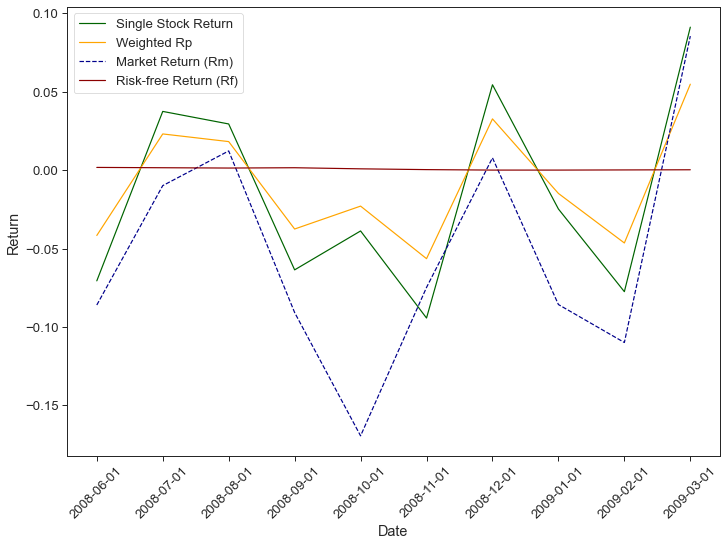

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
dates = [str(date)[:10] for date in financial_crisis_df.index]  # x-axis
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('ticks')
sns.set_context('paper', font_scale=1.5, rc={'grid.linewidth':0.6})
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Return')
sns.lineplot(dates, financial_crisis_df['Portfolio Return'], color='darkgreen')
sns.lineplot(dates, financial_crisis_df['Weighted Rp'], color='orange')
sns.lineplot(dates, financial_crisis_df['Market Return'], color='darkblue', ls='--')
sns.lineplot(dates, financial_crisis_df['RF Return'], color='darkred')

plt.legend(labels=['Single Stock Return','Weighted Rp','Market Return (Rm)','Risk-free Return (Rf)'])

## Conclusions

---

Although the assumptions behind the use of the CAPM model in portfolio construction might struggle fitting real-life scenarios, it is still the most widely adopted tool to evaluate reasonableness of future expectations, or to to conduct comparisons between stocks.\
\
In this project I show all three applications of the CAPM model: Individual Stock Analysis, Multi-Stock Analysis, and Robustness of a weighted portfolio in a hard-time scenario.\
Because the CAMP model performs linear regression on a series of historical data, it is not always the case that the more data we feed the model with, the better the result. 
